# Data Visualization 

Python is a very popular programming language and has very good libraries like _**NumPy**_ and _**Pandas**_ to manipulate data and _**Matplotlib**_ and _**Seaborn**_ to visualize the data. We can make many types of visualizations like Bar graphs, Line graphs, Boxplots, Histograms. 

Data visulalization is all about loading data, simplifying data, cleaning data, augmenting data (when it is not reach enough) and understand data on a more intuitive level. 

First of all, we need data in a plottable form to be able to plot data. NumPy and Pandas can be used for this purpose. We can efficinetly load, store, manipulate and export data using this libraries.

Matplotlib and Seaborn are very popular Python plotting libraries. While Matplotlib API is relatively low-level, Seaborn API is hig-level and provides high-level graphics.   

### Data Loading

We can load/import data from a csv file or an excel file using Pandas library. First, we need to import Pandas library. Then, we get our data using Pandas' read_csv function which takes the file path or url of the file as argument. 

In [1]:
import pandas as pd
file_url = 'https://drive.google.com/uc?id=1_0F4v5dven3QQ9QgmJieoxmTJi6mwjT5' 
dataset = pd.read_csv(file_url)

Let's look at a small part of our dataset to figure out what kind of data we have. Rows include observations and columns include features. Rows have labels called indices or headers. It starts with zero. 

In [2]:
dataset.head(5)  # show the first 5 rows

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna


In [3]:
dataset.tail(5)  # show the last 5 rows

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
403,56,3951.11,796.01,9.54,786.47,3164.64,60,0.029,VW Golf R
404,57,3164.64,796.01,7.64,788.37,2376.27,60,0.029,VW Golf R
405,58,2376.27,796.01,5.74,790.27,1586.00,60,0.029,VW Golf R
406,59,1586.00,796.01,3.83,792.18,793.82,60,0.029,VW Golf R
407,60,793.82,796.01,1.91,794.10,-0.28,60,0.029,VW Golf R



Each tabular view above is called Pandas' _**DataFrame**_ and we transfer some content of the data into the DataFrame.  

In [4]:
type(dataset)  # type is Pandas Dataframe

pandas.core.frame.DataFrame


Now we can examine the data whether it is correctly loaded and valid. We also want to see the last rows to see if they have same format as the first rows.

The data here shows you for example how much you will pay in interest over time or you can find out how much will be the total interest payment according to months for a particular car. But it is hard to see these informations just by looking at this table. That's why we need visualizations. 

We should verify our dataset. There are a couple of methods and attributes in Pandas library for it. For example:

In [5]:
dataset.shape  # to see the shape of our dataset

(408, 9)

In [6]:
dataset.dtypes  # to check the column data types

Month                 int64
Starting Balance    float64
Repayment           float64
Interest Paid       float64
Principal Paid      float64
New Balance         float64
term                  int64
interest_rate       float64
car_type             object
dtype: object

In [7]:
dataset.info()  # gives you number of non-null values in the each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
Month               408 non-null int64
Starting Balance    408 non-null float64
Repayment           408 non-null float64
Interest Paid       407 non-null float64
Principal Paid      408 non-null float64
New Balance         408 non-null float64
term                408 non-null int64
interest_rate       408 non-null float64
car_type            408 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 28.8+ KB


The last one is important to do because null values are not preferred for data analysis or visualization tasks. Here we have one null value in tje Interested Paid column. We will look at it in Missing Data section in detail.

### Slicing

When we have a large dataset (which will be oftentimes), we can work on a smaller subset of it. For this, we can use following slicing techniques:

In [8]:
dataset[['car_type']].tail()  # select one column, tail takes 5 default

,car_type
403,VW Golf R
404,VW Golf R
405,VW Golf R
406,VW Golf R
407,VW Golf R


In [9]:
dataset[['car_type', 'Principal Paid']].tail()  # select multiple columns

,car_type,Principal Paid
403,VW Golf R,786.47
404,VW Golf R,788.37
405,VW Golf R,790.27
406,VW Golf R,792.18
407,VW Golf R,794.10


In [10]:
dataset['car_type'].head()  # if we use single brackets, we get Pandas series

0    Toyota Sienna
1    Toyota Sienna
2    Toyota Sienna
3    Toyota Sienna
4    Toyota Sienna
Name: car_type, dtype: object

In [11]:
type(dataset['car_type'].head())  # type is Pandas series

pandas.core.series.Series

We cannot select multiple columns using single brackets. 

With Pandas series, we can select rows using slicing:

In [12]:
dataset['car_type'][3:9]   # series[start_index:end_index] 

3    Toyota Sienna
4    Toyota Sienna
5    Toyota Sienna
6    Toyota Sienna
7    Toyota Sienna
8    Toyota Sienna
Name: car_type, dtype: object

### Filtering

We can filter out the data using filtering techniques. 

In [13]:
dataset['car_type'].value_counts()  # to see what kind of cars we have

VW Golf R         144
Toyota Sienna     120
Toyota Carolla    111
Toyota Corolla     33
Name: car_type, dtype: int64

Here we can see that we have misspelling- Toyota Carolla instead of Toyota Corolla. 

In [14]:
car_filter=dataset['car_type']=='Toyota Sienna'  # produces Pandas series with True or False values
car_filter.head(5)

0    True
1    True
2    True
3    True
4    True
Name: car_type, dtype: bool

We can get observations only about Toyota Sienna using above car_filter:

In [15]:
dataset[car_filter]  # shows observations related to Toyota Sienna

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
0,1,34689.96,687.23,202.93,484.30,34205.66,60,0.0702,Toyota Sienna
1,2,34205.66,687.23,200.10,487.13,33718.53,60,0.0702,Toyota Sienna
2,3,33718.53,687.23,197.25,489.98,33228.55,60,0.0702,Toyota Sienna
3,4,33228.55,687.23,194.38,492.85,32735.70,60,0.0702,Toyota Sienna
4,5,32735.70,687.23,191.50,495.73,32239.97,60,0.0702,Toyota Sienna
...,...,...,...,...,...,...,...,...,...
115,56,3133.83,632.47,9.37,623.10,2510.73,60,0.0359,Toyota Sienna
116,57,2510.73,632.47,7.51,624.96,1885.77,60,0.0359,Toyota Sienna
117,58,1885.77,632.47,5.64,626.83,1258.94,60,0.0359,Toyota Sienna
118,59,1258.94,632.47,3.76,628.71,630.23,60,0.0359,Toyota Sienna


In [16]:
dataset_sienna = dataset[car_filter]  # update the dataFrame after applying the filter
dataset_sienna['car_type'].value_counts()  # shows that we have only the dataFrame of Toyota Sienna

Toyota Sienna    120
Name: car_type, dtype: int64

### Renaming/Deleting Columns

Sometimes we may want to change the name of the columns. For example, when we see car_type column, we can use the following code:

In [17]:
dataset.car_type.head()

0    Toyota Sienna
1    Toyota Sienna
2    Toyota Sienna
3    Toyota Sienna
4    Toyota Sienna
Name: car_type, dtype: object

However, if we want to see Interest Paid column, we cannot use this way because we have a space in the name and this will create error. You can try to see the error by uncommenting the following.

In [18]:
# dataset.Principal Paid.head()  # dataset['Principal Paid'].head() would work here

Therefore, we may want to change the name of the columns. One approach to change the name of the columns is the dictionary substitution using rename method:

In [19]:
dataset_rn = dataset.rename(columns={'Starting Balance': 'starting_balance',
                                  'Interest Paid' : 'interest_paid',
                                  'Principal Paid': 'principal_paid',
                                  'New Balance': 'new_balance'})

In [20]:
dataset_rn.columns  # to check whether the names of the columns changed

Index(['Month', 'starting_balance', 'Repayment', 'interest_paid',
       'principal_paid', 'new_balance', 'term', 'interest_rate', 'car_type'],
      dtype='object')

We can delete the columns using one of the two approaches. 

In [21]:
del_dataset = dataset.drop(columns={'Repayment'})  # we can drop multiple columns
del_dataset.columns

Index(['Month', 'Starting Balance', 'Interest Paid', 'Principal Paid',
       'New Balance', 'term', 'interest_rate', 'car_type'],
      dtype='object')

In [22]:
del del_dataset['Month'] 
del_dataset.columns

Index(['Starting Balance', 'Interest Paid', 'Principal Paid', 'New Balance',
       'term', 'interest_rate', 'car_type'],
      dtype='object')

### Missing Data

Before we graph data, we need to be sure there are no missing values like null, False, N/A, empty string. In Pandas, missing values are called NaN or None. 

If we have one of them in a row, then we should remove that row or fill in the missing data with a reasonable value. The _**isna**_ and _**isnull**_ methods can be used to indicate where the values in the DataFrame are missing. They are exaclty same methods. They return True if we have a missing value.


In [23]:
interest_missing = dataset['Interest Paid'].isnull()  # produces Panda series with True and False
dataset[interest_missing]  # shows the location of the missing value (we filter it)

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
34,35,16530.59,687.23,NaN,590.53,15940.06,60,0.0702,Toyota Sienna


The _**NOT**_ operation _**(~)**_ will reverse the filter values, and bring back only the rows where data exists.

In [24]:
dataset[~interest_missing][32:37]  # shows the rows which don't have any missing value

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,term,interest_rate,car_type
32,33,17701.37,687.23,103.55,583.68,17117.69,60,0.0702,Toyota Sienna
33,34,17117.69,687.23,100.13,587.10,16530.59,60,0.0702,Toyota Sienna
35,36,15940.06,687.23,93.24,593.99,15346.07,60,0.0702,Toyota Sienna
36,37,15346.07,687.23,89.77,597.46,14748.61,60,0.0702,Toyota Sienna
37,38,14748.61,687.23,86.27,600.96,14147.65,60,0.0702,Toyota Sienna


In [25]:
dataset['Interest Paid'].isnull().sum()  # counts the number of missing values

1

We can remove missing values by using the _**dropna**_ method. However, deleting the entire row may not be the best strategy for our dataset. 

In [26]:
drop_mv = dataset.dropna(how='any')  # drop entire row if it contains any NaNs 
drop_mv['Interest Paid'][32:37]  # shows that it drops the row 34

32    103.55
33    100.13
35     93.24
36     89.77
37     86.27
Name: Interest Paid, dtype: float64

We can fill in the NaN value with a value. For this, we can use _**fillna()**_ method. 

In [27]:
fill_mv = dataset.fillna(0)  # filling in the nan value with zero, it is not recommended
fill_mv['Interest Paid'][32:37]

32    103.55
33    100.13
34      0.00
35     93.24
36     89.77
Name: Interest Paid, dtype: float64

Another approach is to fill in with the _**bfill()**_ method. Back fill looks for the next row's value and changes NaN with that value. This is commanly done when we have time series data. 

In [28]:
bfill_mv = dataset.bfill()  # looks for the next row and takes that value for NaN 
bfill_mv['Interest Paid'][32:37]  # shows that the values of 35 and 34 are same

32    103.55
33    100.13
34     93.24
35     93.24
36     89.77
Name: Interest Paid, dtype: float64

Another way is to forward fill in the value with _**ffill()**_ method. Forward fill looks for the previous row's value and takes and inserts it at the value that is missing. 

In [29]:
ffill_mv = dataset.ffill()  # looks for the previous row and takes that value for NaN
ffill_mv['Interest Paid'][32:37]  # shows that the values 33 and 34 are same

32    103.55
33    100.13
34    100.13
35     93.24
36     89.77
Name: Interest Paid, dtype: float64

These techniques are called _**data imputation**_.

Another way to fill in the missing values is through linear interpolation using _**interpolate**_ method. 

In [30]:
linear_mv = dataset.interpolate(method = 'linear')  # uses linear model to fill in the NaN 
linear_mv['Interest Paid'][32:37]  # shows that the value is the average of 33 and 35

32    103.550
33    100.130
34     96.685
35     93.240
36     89.770
Name: Interest Paid, dtype: float64

The sum() method ignores NaN values. However, after filling in the missing values with a real value, sum will change: 

In [31]:
sienna_dataset = dataset['car_type']=='Toyota Sienna'
sienna_dataset = dataset[sienna_dataset]
print("Sum before filling in:", sienna_dataset['Interest Paid'].sum())

linear_mv = sienna_dataset.interpolate(method = 'linear')
print("Sum after filling in:", linear_mv['Interest Paid'].sum())

Sum before filling in: 9704.69
Sum after filling in: 9801.375


I think linear method makes sense more. The final dataset will be following and there is no any missing value in the dataset anymore:

In [32]:
dataset = dataset.interpolate(method = 'linear')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
Month               408 non-null int64
Starting Balance    408 non-null float64
Repayment           408 non-null float64
Interest Paid       408 non-null float64
Principal Paid      408 non-null float64
New Balance         408 non-null float64
term                408 non-null int64
interest_rate       408 non-null float64
car_type            408 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 28.8+ KB


We may want to convert our Pandas DataFrame to NumPy arrays because some libraries takes NumPy arrays as inputs to their methods. Moreover, NumPy arrays, as compared to nested lists, are more efficient to process. In this case, we cannot use Pandas DataFrames and we convert them to NumPy arrays using _**to_numpy()**_ method or _**values**_ attribute as following:  

In [33]:
dataset_np = dataset.to_numpy()  # convert the dataset to NumPy array, dataset.values would also work
print(dataset_np)

[[1 34689.96 687.23 ... 60 0.0702 'Toyota Sienna']
 [2 34205.66 687.23 ... 60 0.0702 'Toyota Sienna']
 [3 33718.53 687.23 ... 60 0.0702 'Toyota Sienna']
 ...
 [58 2376.27 796.01 ... 60 0.028999999999999998 'VW Golf R']
 [59 1586.0 796.01 ... 60 0.028999999999999998 'VW Golf R']
 [60 793.82 796.01 ... 60 0.028999999999999998 'VW Golf R']]


In [34]:
print(dataset_np.shape)  # same shape as NumPy array
print(type(dataset_np))  # type is NumPy array now

(408, 9)
<class 'numpy.ndarray'>


We can also convert the pandas DataFrame to Python dictioneries using _**to_dict()**_ method. We do this when we want to preserve the indices of Pandas DataFrames. 

In [35]:
dataset_dict = dataset.to_dict()  # convert to Python dictionary
print(type(dataset_dict))  # type is dict now

<class 'dict'>


In [36]:
# dataset_dict['Month'] # uncomment to see that indices are preserved

## Matplotlib

It is an old library and used frequently to create visualizations in 2D or 3D. To be able to use it, we need to import this library first. 

In [37]:
import matplotlib.pyplot as plt  # import the matplotlib.pyplot module and use alias plt for it

# inline flag will use the appropriate backend to make figures appear inline in the notebook
%matplotlib inline  

In [38]:
dataset.info()  # we need to make sure that we don't have any missing values before plotting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 9 columns):
Month               408 non-null int64
Starting Balance    408 non-null float64
Repayment           408 non-null float64
Interest Paid       408 non-null float64
Principal Paid      408 non-null float64
New Balance         408 non-null float64
term                408 non-null int64
interest_rate       408 non-null float64
car_type            408 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 28.8+ KB


Let's graph first 60 Month numbers on the x-axis and first 60 Interest Paid and Principal Paid on the y-axis. For this, we need to have our data in the form of NumPy arrays:

In [39]:
month_numbers = dataset['Month'][0:60].to_numpy()
interest_paid = dataset['Interest Paid'][0:60].to_numpy()
principal_paid = dataset['Principal Paid'][0:60].to_numpy()

We converted our columns to NumPy arrays and assign them to the some variables. Now, we have our data in the appropriate format, we can plot them:

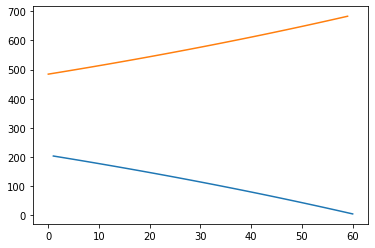

In [40]:
plt.plot(month_numbers, interest_paid, principal_paid) 

We plotted the values using default plot. We can use another styles to make them appear nicer. For this we can use _**plt.style.use()**_ method. We can select various styles. One example:

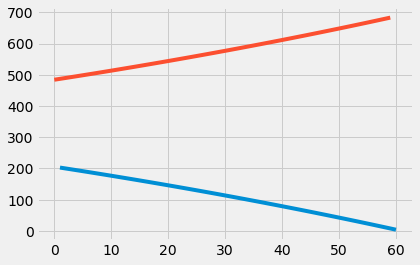

In [41]:
plt.style.use('fivethirtyeight')  # use fivethirtyeight style for plotting
plt.plot(month_numbers, interest_paid, principal_paid) 

We can set markers using _**marker**_ parameter or change colors using _**c**_ parameter to make our plots more understandable. For example:

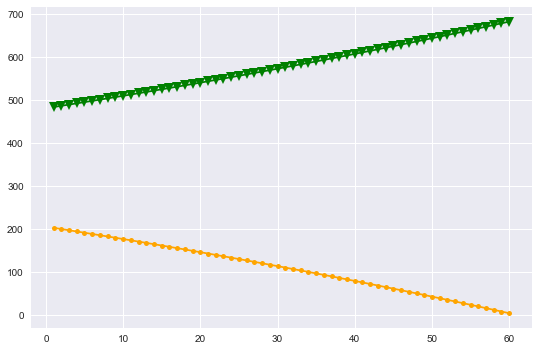

In [42]:
plt.style.use('seaborn')
plt.plot(month_numbers, interest_paid, c = 'orange', marker='.', markersize=10) 
plt.plot(month_numbers, principal_paid, c = 'green', marker='v', markersize=10) 

We can change the size of the plot and add title, legends, labels on axis and limit on axis. Additionally, we can save our plots to files outside of Jupyte Notebook using _**savefig()**_ method: 

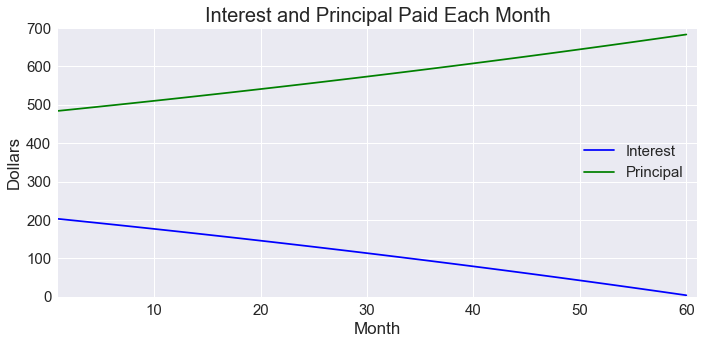

In [43]:
plt.figure(figsize=(10,5))  # change the size of the graph
plt.style.use('tableau-colorblind10')  # use tableau-colorblind10 style

plt.plot(month_numbers, interest_paid, c = 'blue', label = 'Interest')  # plot and add legend 
plt.plot(month_numbers, principal_paid, c = 'green', label = 'Principal')  # plot and add legend

plt.title('Interest and Principal Paid Each Month', fontsize = 20)  # set a title for the graph
plt.xlabel('Month', fontsize = 17)  # set lable on x axis
plt.ylabel('Dollars', fontsize = 17)  # set label on y axis

plt.xticks(fontsize=15)  # set size of the values on x axis
plt.yticks(fontsize=15)  # # set size of the values on y axis
plt.xlim(left=1, right=61)  # set limits on x axis
plt.ylim(bottom=0,top=700)  # set limit on y axis
plt.legend(loc="center right", fontsize = 15)  # show legends and set their location and size

plt.tight_layout()  # to fit graph into the figure area, to prevent the image will be cutoff
plt.savefig('Interest and Principal Paid Each Month.png', dpi = 300)  # dpi is like resolution